In [153]:
import pandas as pd
import numpy as np
import seaborn as sns

In [154]:
df=pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [155]:
features = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
df_features = df[features]
df_features

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

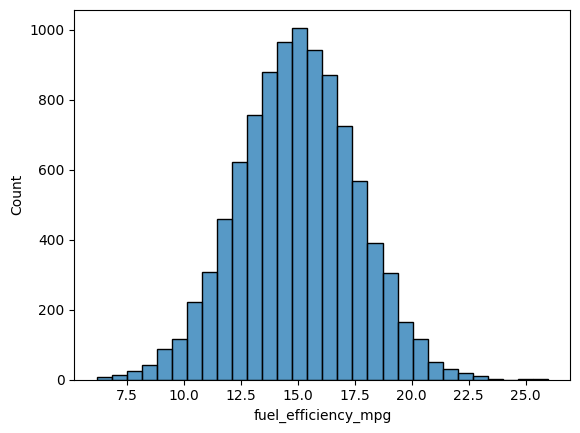

In [156]:
sns.histplot(df_features['fuel_efficiency_mpg'], bins=30)

In [157]:
df['horsepower'].median()


np.float64(149.0)

In [158]:
n=len(df_features)
n_train=int(0.6*len(df_features))
n_val=int(0.2*len(df_features))
n_test=n-n_train-n_val

n, n_train+n_val+n_test

(9704, 9704)

In [159]:
index=np.arange(n)
np.random.seed(42)
np.random.shuffle(index)
index

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [160]:
df_train=df_features.iloc[index[:n_train]]
df_val=df_features.iloc[index[n_train:n_train+n_val]]
df_test=df_features.iloc[index[n_train+n_val:]]


In [161]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)


In [162]:

y_train=df_train.fuel_efficiency_mpg.values
y_val=df_val.fuel_efficiency_mpg.values
y_test=df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [163]:
def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

In [164]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [165]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [166]:
# with zero imputation
w0,w=train_linear_regression(prepare_X(df_train, fillna_value=0), y_train)
y_val_pred=w0+prepare_X(df_val, fillna_value=0).dot(w)
round(rmse(y_val, y_val_pred),2)


np.float64(0.52)

In [167]:
#with mean imputation
fillna_value=df_train.mean()
w0,w=train_linear_regression(prepare_X(df_train, fillna_value=fillna_value), y_train)
y_val_pred=w0+prepare_X(df_val, fillna_value=fillna_value).dot(w)
round(rmse(y_val, y_val_pred),2)

np.float64(0.46)

In [174]:
def linear_regression_regularized(X, y, r_lambda=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    n_features = XTX.shape[0]
    XTX_reg = XTX + r_lambda * np.eye(n_features)
    XTX_reg_inv = np.linalg.inv(XTX_reg)
    w = XTX_reg_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [175]:
r=[0, 0.01, 0.1, 1, 5, 10, 100]
X_train=prepare_X(df_train, fillna_value=0)
X_val=prepare_X(df_val, fillna_value=0)

for reg in r:   
    w0,w=linear_regression_regularized(X_train, y_train, r_lambda=reg)
    y_val_pred=w0+X_val.dot(w)
    score=rmse(y_val, y_val_pred)
    print('reg:',reg,'rmse:',score) 

reg: 0 rmse: 0.5171866956555938
reg: 0.01 rmse: 0.5169342809302991
reg: 0.1 rmse: 0.5186269290189828
reg: 1 rmse: 0.5221435511942797
reg: 5 rmse: 0.5228049144164629
reg: 10 rmse: 0.52289520849927
reg: 100 rmse: 0.5229780848007723


In [178]:
seed=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmses=[]
for s in seed:
    np.random.seed(s)
    index=np.arange(n)
    np.random.shuffle(index)

    df_train=df_features.iloc[index[:n_train]]
    df_val=df_features.iloc[index[n_train:n_train+n_val]]
    df_test=df_features.iloc[index[n_train+n_val:]]
    
    df_train=df_train.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)
    
    y_train=df_train.fuel_efficiency_mpg.values
    y_val=df_val.fuel_efficiency_mpg.values
    y_test=df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    X_train=prepare_X(df_train, fillna_value=0)
    X_val=prepare_X(df_val, fillna_value=0)

    w0,w=train_linear_regression(X_train, y_train)
    y_val_pred=w0+X_val.dot(w)
    score=rmse(y_val, y_val_pred)
    rmses.append(score)
    print('seed:',s,'rmse:',score)

np.std(rmses)

seed: 0 rmse: 0.5210993169601764
seed: 1 rmse: 0.5218422383656937
seed: 2 rmse: 0.5230384520042021
seed: 3 rmse: 0.5161215334520273
seed: 4 rmse: 0.5111869530280668
seed: 5 rmse: 0.5286833855544149
seed: 6 rmse: 0.532241891856728
seed: 7 rmse: 0.5095258233932749
seed: 8 rmse: 0.5149083792268891
seed: 9 rmse: 0.5131330922627657


np.float64(0.007126319129031008)

In [184]:
seed=9
np.random.seed(seed)
index=np.arange(n)
np.random.shuffle(index)

df_train=df_features.iloc[index[:n_train]]
df_val=df_features.iloc[index[n_train:n_train+n_val]]
df_test=df_features.iloc[index[n_train+n_val:]] 

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

y_train=df_train.fuel_efficiency_mpg.values
y_val=df_val.fuel_efficiency_mpg.values
y_test=df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_full_train=pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train, fillna_value=0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = linear_regression_regularized(X_full_train, y_full_train, r_lambda=0.001)
X_test=prepare_X(df_test, fillna_value=0)

y_test_pred=w_0+X_test.dot(w)
rmse(y_test, y_test_pred)

np.float64(0.515504336928875)